<a href="https://colab.research.google.com/github/VishanOberoi/Machine-Learning-/blob/main/TitanicData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading titanic data

titanic = sns.load_dataset('titanic')

#Printing first 10 rows

titanic.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
#Counting rows and columns

titanic.shape
#there were more but my dataset has only 891 passangers

(891, 15)

In [ ]:
#Finding the data specific to numerical columns

titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here the age is 714 instead of 891, this means that some data is missing.
The maximum age is 80 years. Minimum age is 0.42 years.
The mean age is around 29 years.

We also see the variation in price paid by passangers.

In [ ]:
# Finding the number of survivors

titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

Thus we see, 342 survived and 549 people died. All aboard the "unsinkable ship".

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


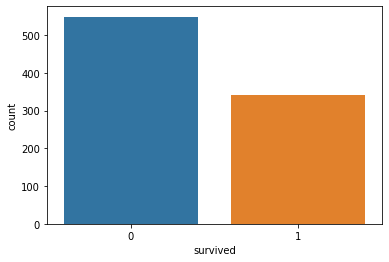

In [ ]:
#Visualizing the surviour count
sns.countplot(titanic['survived'])

# 0 = Did not survive
# 1 = Survived

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

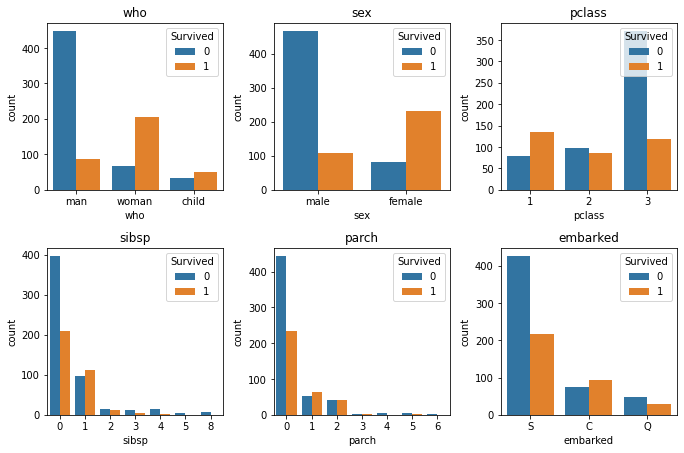

In [ ]:
# Visualizing survivor count for diffrent columns
# who, sex, pclass(Seating), sibsp(sibling/spouse), parch(parent/child)
#embark(where passanger embarked from)

cols = ['who','sex','pclass','sibsp','parch','embarked']

n_rows = 2
n_cols = 3

#Making grids
fig, axs = plt.subplots(n_rows,n_cols,figsize = (n_cols*3.2, n_rows*3.2))

#Looping through columns

for r in range(0,n_rows):
  for c in range(0,n_cols):
    i = r*n_cols +c
    ax = axs[r][c]#positioning subplots

    sns.countplot(titanic[cols[i]], hue = titanic['survived'], ax =ax)
    ax.set_title(cols[i])
    ax.legend(title="Survived", loc = "upper right")

plt.tight_layout()


In [ ]:
#Survival rate according to sex

titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


Only 18 percent of men survived

While 74 percent of women did

In [ ]:
# Survival rate with gender and class
titanic.pivot_table('survived', index = 'sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


If you were on the titanic, it would be best to be a female in first class

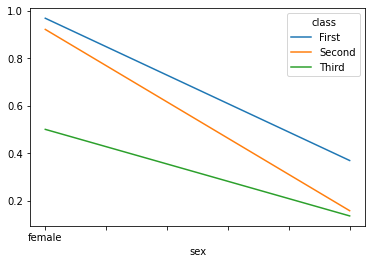

In [ ]:
# Survival rate with gender and class visually
titanic.pivot_table('survived', index = 'sex', columns = 'class').plot()

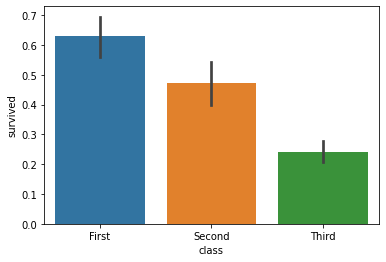

In [ ]:
#Survival rate of  each class
sns.barplot(x = "class", y = "survived", data = titanic)


In [ ]:
#Survival rate by sex,age,class
#Segmenting the age data
age = pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

class            First    Second     Third
sex age                                   
0   (0, 18]   0.909091  1.000000  0.511628
    (18, 80]  0.972973  0.900000  0.423729
1   (0, 18]   0.800000  0.600000  0.215686
    (18, 80]  0.375000  0.071429  0.133663

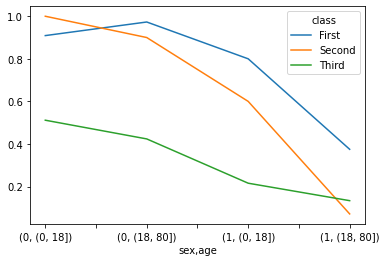

In [ ]:
#Viewing it visually
titanic.pivot_table('survived',['sex',age],'class').plot()

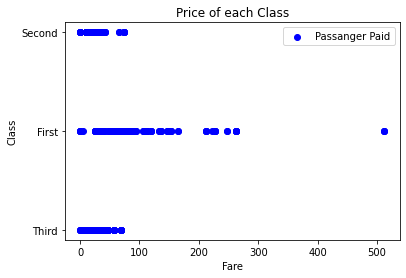

In [ ]:
# Plotting prices paid by each class

plt.scatter(titanic['fare'], titanic['class'], color = 'blue', label = "Passanger Paid")
plt.ylabel("Class")
plt.xlabel("Fare")
plt.title("Price of each Class")
plt.legend()
plt.show()

Someone managed to board first class for 0 pounds

While someone paid 500 pounds for the same ticket

In [ ]:
#Counting empty values
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
#FInding counts

for val in titanic:
  print(titanic[val].value_counts())
  print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

1    577
0    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: de

In [ ]:
#Dropping redunant columns
#titanic = titanic.drop(["deck","embark_town","alive","class","who","alone","adult_male"], axis = 1)

#removing rows with missing data
titanic = titanic.dropna(subset=['embarked','age'])

In [ ]:
  #Count new rows and cols

  titanic.shape

(712, 15)

In [ ]:
#Looking at data types
titanic.dtypes

survived          int64
pclass            int64
sex               int64
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [ ]:
#Unique values in cols
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
['S' 'C' 'Q']


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#Encoding sex col into numerical value

titanic.iloc[:,2] = labelencoder.fit_transform(titanic.iloc[:,2].values)
#Encoding embark col into numerical value
titanic.iloc[:,7] = labelencoder.fit_transform(titanic.iloc[:,7].values)

In [ ]:
#Numerically transformed values
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [ ]:
#verifying wih data types
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [ ]:
#Splitting data into independent "x" and "y" variables

X = titanic.iloc[:,1:8].values
Y = titanic.iloc[:,0].values

In [ ]:
#Split data set into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [ ]:
#Scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#creating function with machine learning

def models(X_train,Y_train):
  #Using logistic regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #Use KNeighbours
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p =2)
  knn.fit(X_train,Y_train)

  #Using svc (linear kernel)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #RBF kernel
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #GuassianNB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train,Y_train)

  #Decision tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
  tree.fit(X_train,Y_train)

  #RandomForest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion ="entropy", random_state = 0)
  forest.fit(X_train,Y_train)

  #Print training accuracy
  print('[0]Logisitc Regression Training accuracy:', log.score(X_train, Y_train))
  print('[1]K Neighbours Training accuracy:', knn.score(X_train, Y_train))
  print('[2]SVC linear Training accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]SVC rbf Training accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian NB Training accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision tree Training accuracy:', tree.score(X_train, Y_train))
  print('[6]Random forest Training accuracy:', forest.score(X_train, Y_train))


  return log,knn,svc_lin, svc_rbf, gauss, tree, forest


In [ ]:
#Training the models

model = models(X_train, Y_train)

[0]Logisitc Regression Training accuracy: 0.7978910369068541
[1]K Neighbours Training accuracy: 0.8664323374340949
[2]SVC linear Training accuracy: 0.7768014059753954
[3]SVC rbf Training accuracy: 0.8506151142355008
[4]Gaussian NB Training accuracy: 0.8031634446397188
[5]Decision tree Training accuracy: 0.9929701230228472
[6]Random forest Training accuracy: 0.9753954305799648


In [ ]:
#Showing confusion matrix and accuracy

from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  #Extracting Tn, fp, fn , tp
  TN,FP,FN,TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

  test_score = (TP+TN)/(TP+TN+FN+FP)
  print(cm)
  print("Model[{}] Testing Accuracy = {}".format(i,test_score))
  print()

[[75  7]
 [19 42]]
Model[0] Testing Accuracy = 0.8181818181818182

[[67 15]
 [20 41]]
Model[1] Testing Accuracy = 0.7552447552447552

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = 0.7902097902097902

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = 0.7972027972027972

[[69 13]
 [27 34]]
Model[4] Testing Accuracy = 0.7202797202797203

[[54 28]
 [12 49]]
Model[5] Testing Accuracy = 0.7202797202797203

[[73  9]
 [14 47]]
Model[6] Testing Accuracy = 0.8391608391608392



Model 6 performs the best, so using random forest from here on

In [ ]:
#Feature importance

forest = model[6]
importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances


,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


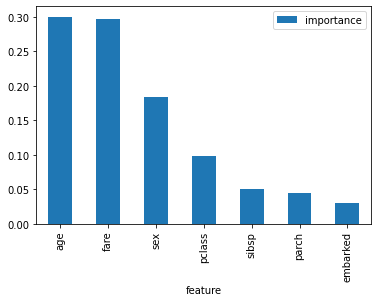

In [ ]:
#Visualising importance
importances.plot.bar()

In [ ]:
#printing prediction of random forest

pred = model[6].predict(X_test)
print(pred)
print()
#Printing actual vale
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [ ]:
X1=np.array([3,1,21,8,6,200,0])

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
my_survival=sc.fit_transform(X1[:, np.newaxis])
my_survival=my_survival.transpose()
pred= model[6].predict(my_survival)
print(pred)

if pred== 0:
  print("Oh no! You did not survive the Titanic.")
else:
  print("Lucky you! You survived the Titanic.")

[1]
Lucky you! You survived the Titanic.


So finally I have managed to create a model to predict the survival of an imaginary passanger. Using Data analysis we were able to narrow down which ML model to use. After identifying the model we implemented it and finally made a prediction.